In [1]:
# Text = 

# "I love python"
# "python is language"
# "python is use for coding"

# # Text convert into Vectors 

# I love python is language use for coding 
# [11100000]
# [00111000]    ----> vectors ----> Polarity_score ---> 0.1 < positive , -0.1> negative , 0 neutral
# [00110111] 

# Textblob library 

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
df = pd.read_csv("C:\\Users\\saurabh\\Desktop\\Newdat\\linkedin-reviews.csv")
df.head(3) 

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1


In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Exploratory Data Analysis

We will start by analyzing the distributions of ratings. It will provide insight into the overall sentiment of the reviews. Then we can explore further, such as analyzing the length of reviews , and possibly derive insights from the text of the reviews.

Plotting the Distribution of Ratings

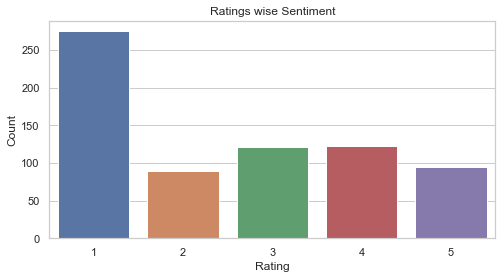

In [11]:
sns.set(style = "whitegrid")
plt.figure(figsize = (8,4))
sns.countplot(data = df , x = "Rating")
plt.title("Ratings wise Sentiment")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show() 

In [14]:
df.groupby('Rating').size().reset_index(name = "candidates") 

,Rating,candidates
0,1,275
1,2,89
2,3,121
3,4,122
4,5,95


# Adding Sentiment Labels in the Data
We will use Textblob library. Textblob provides a polarity scores raning from -1(very negative) to 1(very positive) for a given text . We can use this score to classify each review's sentiment as positive , negative or neutral .

In [15]:
!pip install textblob    

In [16]:
from textblob import TextBlob 

In [17]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1 :
        return 'Positive'
    elif sentiment.polarity < -0.1 :
        return 'Negative'
    else :
        return 'Neutral' 
    

In [18]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis) 

In [23]:
df.sample(5) 

,Review,Rating,Sentiment
456,"Hangs everytime, open the app and nothing. Uni...",1,Neutral
564,App store and market place go tell me to updat...,5,Neutral
60,So far so good HTC thunderbolt,4,Positive
127,Pls allow to edit the profile too,4,Neutral
252,When not freezing up this app loads updates ex...,1,Negative


# Analyzing App Reviews Sentiments

In [25]:
df['Sentiment'].value_counts() 

Positive    298
Neutral     297
Negative    107
Name: Sentiment, dtype: int64

<AxesSubplot:ylabel='Sentiment'>

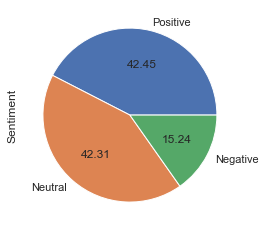

In [26]:
df['Sentiment'].value_counts().plot(kind = "pie" , autopct = "%.2f")

# So , we can see althrough the app has low ratings , still the reviewers don't use many negative words in the reviews for the app.
Next, we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and numerical ratings.

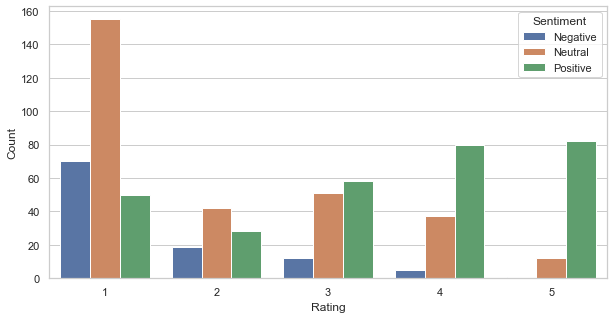

In [27]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
             x = 'Rating',
             hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show() 

# Summary
App Reviews Sentiment Analysis is a valuable tool for app developers and business to understand user feedback, prioritize feature updates and maintain a positive user community. It involves using data analysis tchniques to determine whether the sentiments in these reviews are positive , negative or neutral.

In [29]:
# !pip install numpy